In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import boxcox

In [127]:
df = pd.read_excel('energy_data.xlsx')
df.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                2.242                  0.162   237.33              10.0   
1                3.714                  0.296   235.15              15.8   
2                3.212                  0.304   235.99              14.2   
3                3.694                  0.280   235.16              15.6   
4                3.204                  0.292   236.08              14.0   

   Kitchen_consumption  Laundry_consumption  Other_appliances_consumption  
0                    1                    7                            17  
1                    2                   35                            17  
2                    1                   26                            17  
3                    1                   35                            17  
4                    1                   27                            17

Steps to Follow:  
  
    - Data Preprocessing: Ensure the data is clean and ready for analysis. Handle missing values, and normalize/standardize the data if necessary.  
    - Exploratory Data Analysis (EDA): Perform an initial analysis to understand the data distribution, relationships, and key characteristics.  
    - Model Selection: Choose appropriate clustering algorithms (e.g., K-means, Hierarchical Clustering, DBSCAN). (Tip: You can do all three and compare.)  
    - Parameter Tuning: Experiment with different parameters for the chosen algorithms to find the best fit for the data.  
    - Evaluation: Use appropriate metrics (e.g., Silhouette Score, Davies-Bouldin Index) to evaluate the performance of the clustering models.  
    - Visualization: Provide visualizations to illustrate the clustering results and insights derived from the analysis.  
    - Documentation: Document the entire process, including the rationale for your choices, the steps you followed, and any challenges you encountered.  


#### 1. Data Preprocessing: Ensure the data is clean and ready for analysis. Handle missing values, and normalize/standardize the data if necessary.  

In [128]:
df.isnull().sum()

Global_active_power             0
Global_reactive_power           0
Voltage                         0
Global_intensity                0
Kitchen_consumption             0
Laundry_consumption             0
Other_appliances_consumption    0
dtype: int64

There are no null values fortunately in this dataset! However not all the features have same scaling, so we need to standardize/normalize the features.

In [129]:
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         21240.000000           21240.000000  21240.000000   
mean              3.290522               0.259400    237.324997   
std               1.625414               0.144701      3.416039   
min               0.302000               0.046000    225.120000   
25%               1.866000               0.148000    235.180000   
50%               3.184000               0.236000    237.500000   
75%               4.246000               0.342000    239.570000   
max               9.994000               1.198000    249.150000   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count        21240.0000         21240.000000         21240.000000   
mean            14.0208            13.424529             9.266667   
std              6.9690            16.472617            13.661116   
min              1.2000             1.000000             1.000000   
25%              8.0000             1.000000             1.000000   
50%             13.6000             2.000000             2.000000   
75%             18.0000            36.000000            15.000000   
max             43.4000            40.000000            60.000000   

       Other_appliances_consumption  
count                  21240.000000  
mean                      16.654379  
std                        4.156162  
min                        1.000000  
25%                       17.000000  
50%                       17.000000  
75%                       18.000000  
max                       30.000000

In [130]:
summary = df.describe()

In [131]:
# let's check if any feature has outliers 
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

outlier_thres = 1.5

outliers = (df < (Q1 - outlier_thres * IQR)) | (df > (Q3 + outlier_thres * IQR))

#print features with outliers
features_with_outliers = outliers.any()

if features_with_outliers.any():
    print("Features with outliers:")
    print(features_with_outliers[features_with_outliers].index)
    outlier_features = features_with_outliers[features_with_outliers].index
else:
    print("No features with outliers.")

Features with outliers:
Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Laundry_consumption',
       'Other_appliances_consumption'],
      dtype='object')


In [132]:
additional_features = [col for col in df.columns if col not in outlier_features]
print(additional_features)

['Kitchen_consumption']


In [133]:
additional_df = df[additional_features]
additional_df.head()

Kitchen_consumption
0                    1
1                    2
2                    1
3                    1
4                    1

In [134]:
# now let's check if any features contains zero or negative values beacuse we want to apply box-cox transformation
for features in outlier_features:
    if (df[features] < 0).any():
        print(features)
    else:
        print("No negative or zero values in ", features)

No negative or zero values in  Global_active_power
No negative or zero values in  Global_reactive_power
No negative or zero values in  Voltage
No negative or zero values in  Global_intensity
No negative or zero values in  Laundry_consumption
No negative or zero values in  Other_appliances_consumption


In [135]:
# since there is no negative or zero value we will apply box-cox transformation
new_df = {}; 
for features in outlier_features:
    new_df[features] = boxcox(df[features])[0]

new_df = pd.concat([pd.DataFrame(new_df),additional_df], axis = 1)
new_df.head()

Global_active_power  Global_reactive_power       Voltage  Global_intensity  \
0             0.972952              -1.399741  4.720132e+12          3.863395   
1             1.786645              -1.018438  4.480244e+12          5.178075   
2             1.533379              -0.999909  4.571460e+12          4.848440   
3             1.776930              -1.056571  4.481321e+12          5.137970   
4             1.529172              -1.027834  4.581323e+12          4.805739   

   Laundry_consumption  Other_appliances_consumption  Kitchen_consumption  
0             1.158108                     139.83258                    1  
1             1.488613                     139.83258                    2  
2             1.448600                     139.83258                    1  
3             1.488613                     139.83258                    1  
4             1.454077                     139.83258                    1

In [136]:
summary = new_df.describe()

In [137]:
# let's check if any feature has outliers 
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

outlier_thres = 1.5

outliers = (new_df < (Q1 - outlier_thres * IQR)) | (new_df > (Q3 + outlier_thres * IQR))

#print features with outliers
features_with_outliers = outliers.any()

if features_with_outliers.any():
    print("Features with outliers:")
    print(features_with_outliers[features_with_outliers].index)
    outlier_features = features_with_outliers[features_with_outliers].index
else:
    print("No features with outliers.")

Features with outliers:
Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Other_appliances_consumption'],
      dtype='object')


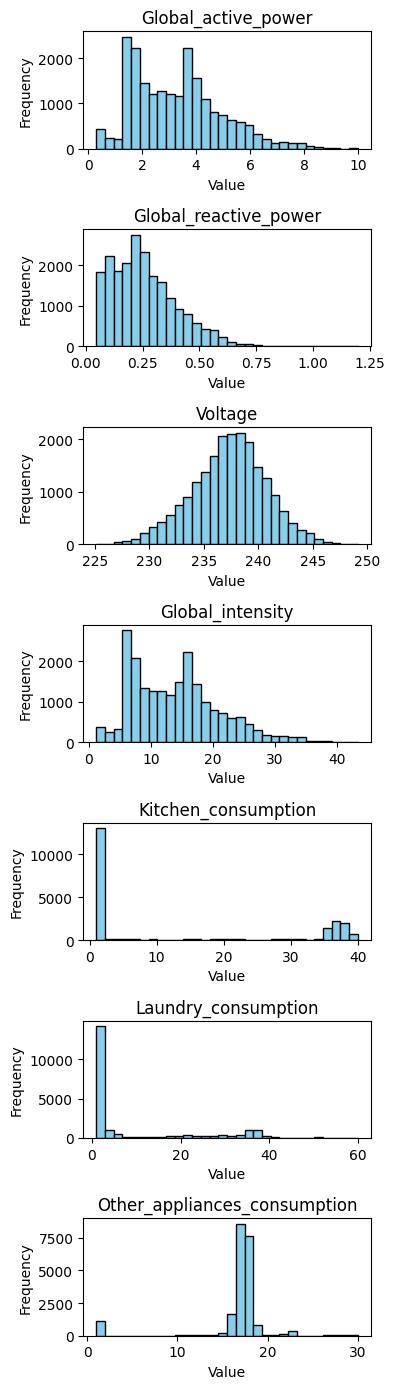

In [138]:
# let's see how the distribution of our data looks like
column_names = df.columns

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(column_names), ncols=1, figsize=(4, 2*len(column_names)))

# Plot histograms for each feature
for i, col in enumerate(column_names):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [139]:
# since boxcox transformation didn't help much and each of the feature has very different scale we will proceed with the original dataset df and try to standardize it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_transformed = scaler.fit_transform(df)
df= pd.DataFrame(df_transformed, columns = df.columns)
df.head()
summary = df.describe()

#### 2. Exploratory Data Analysis (EDA): Perform an initial analysis to understand the data distribution, relationships, and key characteristics.  

In [140]:
# summary statistics
summary

Global_active_power  Global_reactive_power       Voltage  \
count         2.124000e+04           2.124000e+04  2.124000e+04   
mean          2.248045e-16           8.296356e-17  7.193743e-15   
std           1.000024e+00           1.000024e+00  1.000024e+00   
min          -1.838665e+00          -1.474798e+00 -3.572935e+00   
25%          -8.764265e-01          -7.698792e-01 -6.279341e-01   
50%          -6.553709e-02          -1.617135e-01  5.123110e-02   
75%           5.878502e-01           5.708497e-01  6.572104e-01   
max           4.124263e+00           6.486643e+00  3.461694e+00   

       Global_intensity  Kitchen_consumption  Laundry_consumption  \
count      2.124000e+04         2.124000e+04         2.124000e+04   
mean      -2.355095e-16        -5.352488e-18        -1.070498e-17   
std        1.000024e+00         1.000024e+00         1.000024e+00   
min       -1.839733e+00        -7.542713e-01        -6.051381e-01   
25%       -8.639607e-01        -7.542713e-01        -6.051381e-01   
50%       -6.038316e-02        -6.935630e-01        -5.319359e-01   
75%        5.709992e-01         1.370517e+00         4.196925e-01   
max        4.215797e+00         1.613350e+00         3.713791e+00   

       Other_appliances_consumption  
count                  2.124000e+04  
mean                  -3.425592e-16  
std                    1.000024e+00  
min                   -3.766635e+00  
25%                    8.316076e-02  
50%                    8.316076e-02  
75%                    3.237730e-01  
max                    3.211120e+00

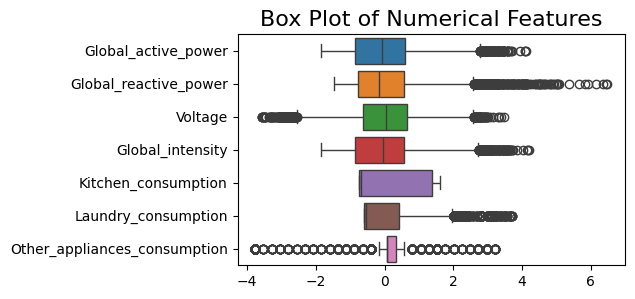

In [141]:
# Box Plots: Identify outliers and compare distributions of numerical features
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Numerical Features', fontsize=16)
plt.show()


In [142]:
from scipy.stats import zscore
# Calculate Z-scores for each feature
z_scores = np.abs(zscore(df))

# Define a threshold for outlier detection
# Replace 'threshold' with your desired threshold (e.g., 3 for a standard threshold)
threshold = 3

# Create a mask to identify outliers
outlier_mask = (z_scores > threshold)

# Alternatively, you can replace outliers with the mean or median of each feature
median_values = df.median()
df[outlier_mask] = np.where(outlier_mask, median_values, df) # Replace with median

# Print the number of outliers treated for each feature
print("Number of outliers treated for each feature:")
print(outlier_mask.sum(axis=0))


Number of outliers treated for each feature:
Global_active_power               82
Global_reactive_power            163
Voltage                           59
Global_intensity                  89
Kitchen_consumption                0
Laundry_consumption              147
Other_appliances_consumption    1177
dtype: int64


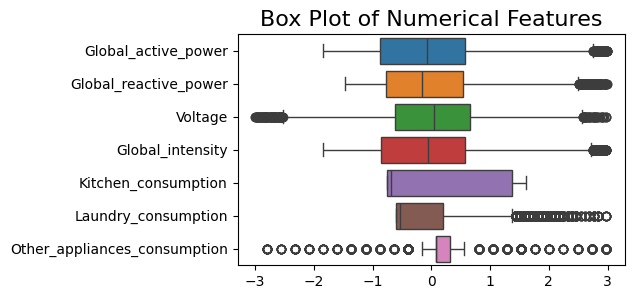

In [143]:
# Box Plots: Identify outliers and compare distributions of numerical features
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Numerical Features', fontsize=16)
plt.show()


In [144]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Kitchen_consumption', 'Laundry_consumption',
       'Other_appliances_consumption'],
      dtype='object')

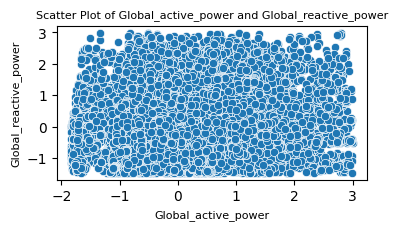

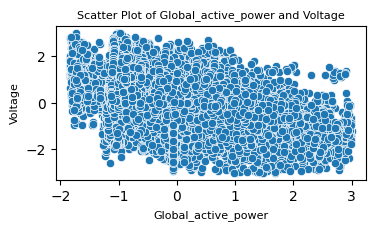

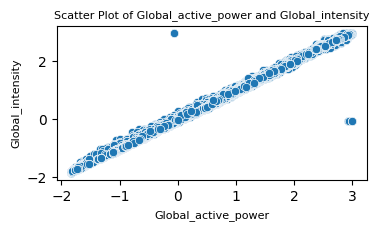

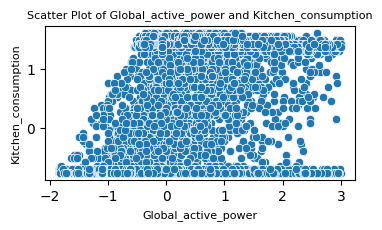

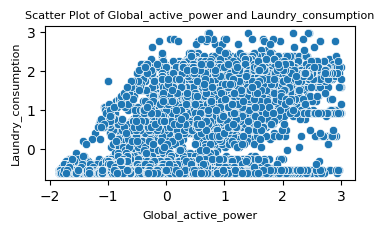

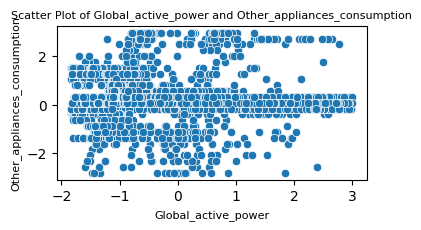

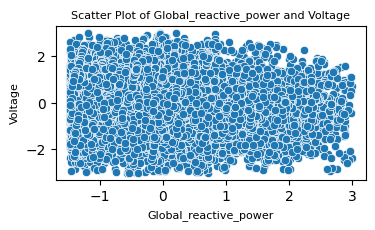

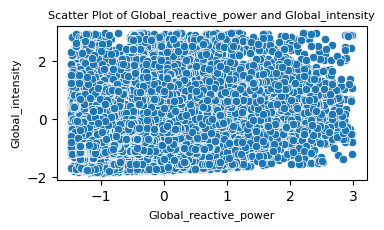

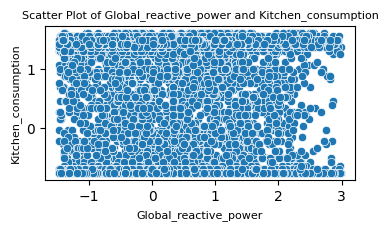

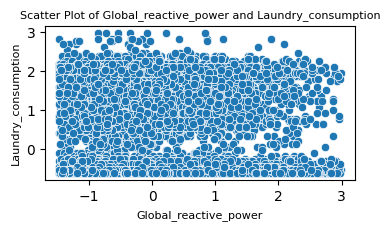

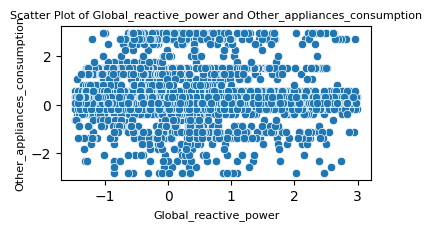

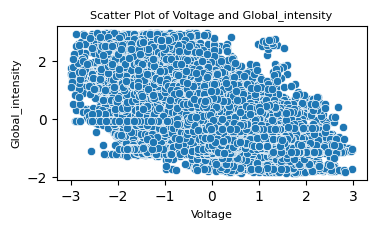

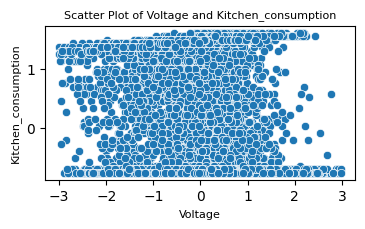

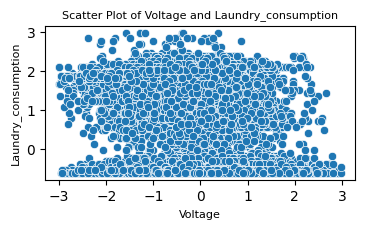

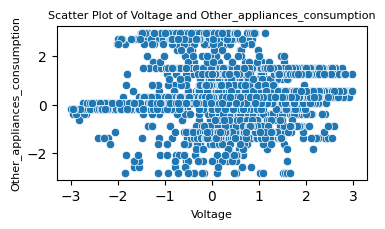

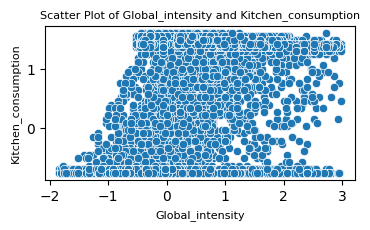

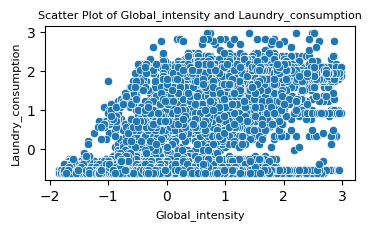

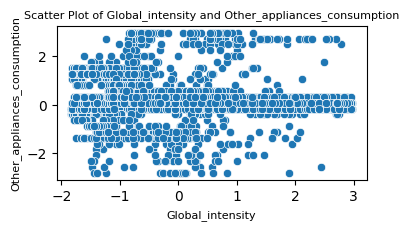

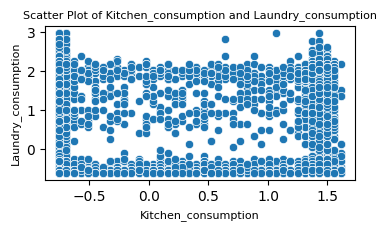

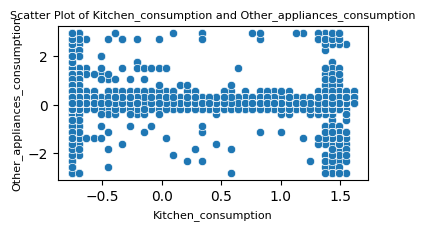

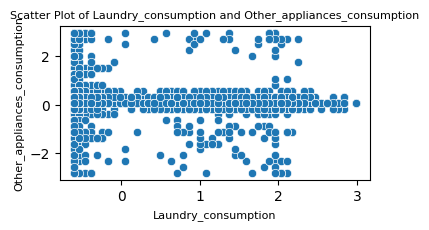

In [145]:
# now the data looks much cleaner
# Scatter Plots: Explore relationships between pairs of numerical features
num_features = df.columns

for i in range(len(num_features)):
    for j in range(i + 1, len(num_features)):
        plt.figure(figsize=(4, 2))
        sns.scatterplot(data=df, x=num_features[i], y=num_features[j])
        plt.title(f'Scatter Plot of {num_features[i]} and {num_features[j]}', fontsize=8)
        plt.xlabel(num_features[i], fontsize=8)
        plt.ylabel(num_features[j], fontsize=8)
        plt.show()

We see 'Global_active_power', 'Global_intensity' has liner relationship so any of the feature will be further excluded due to high correlation

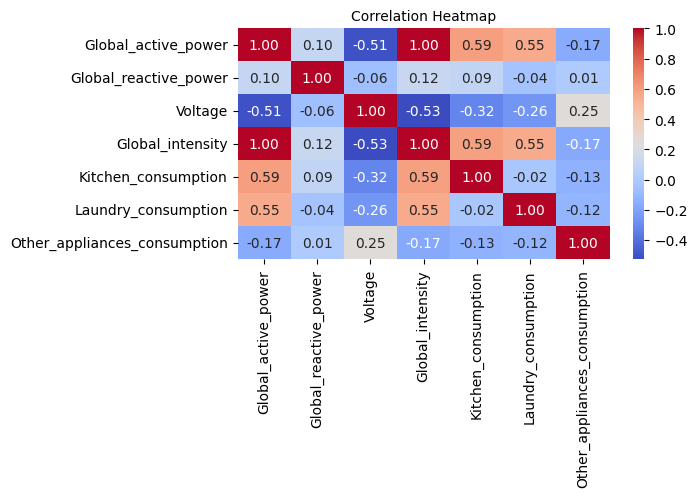

In [146]:
# to confirm this let's plot heatmap
# Heatmap: Create a correlation heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=10)
plt.show()

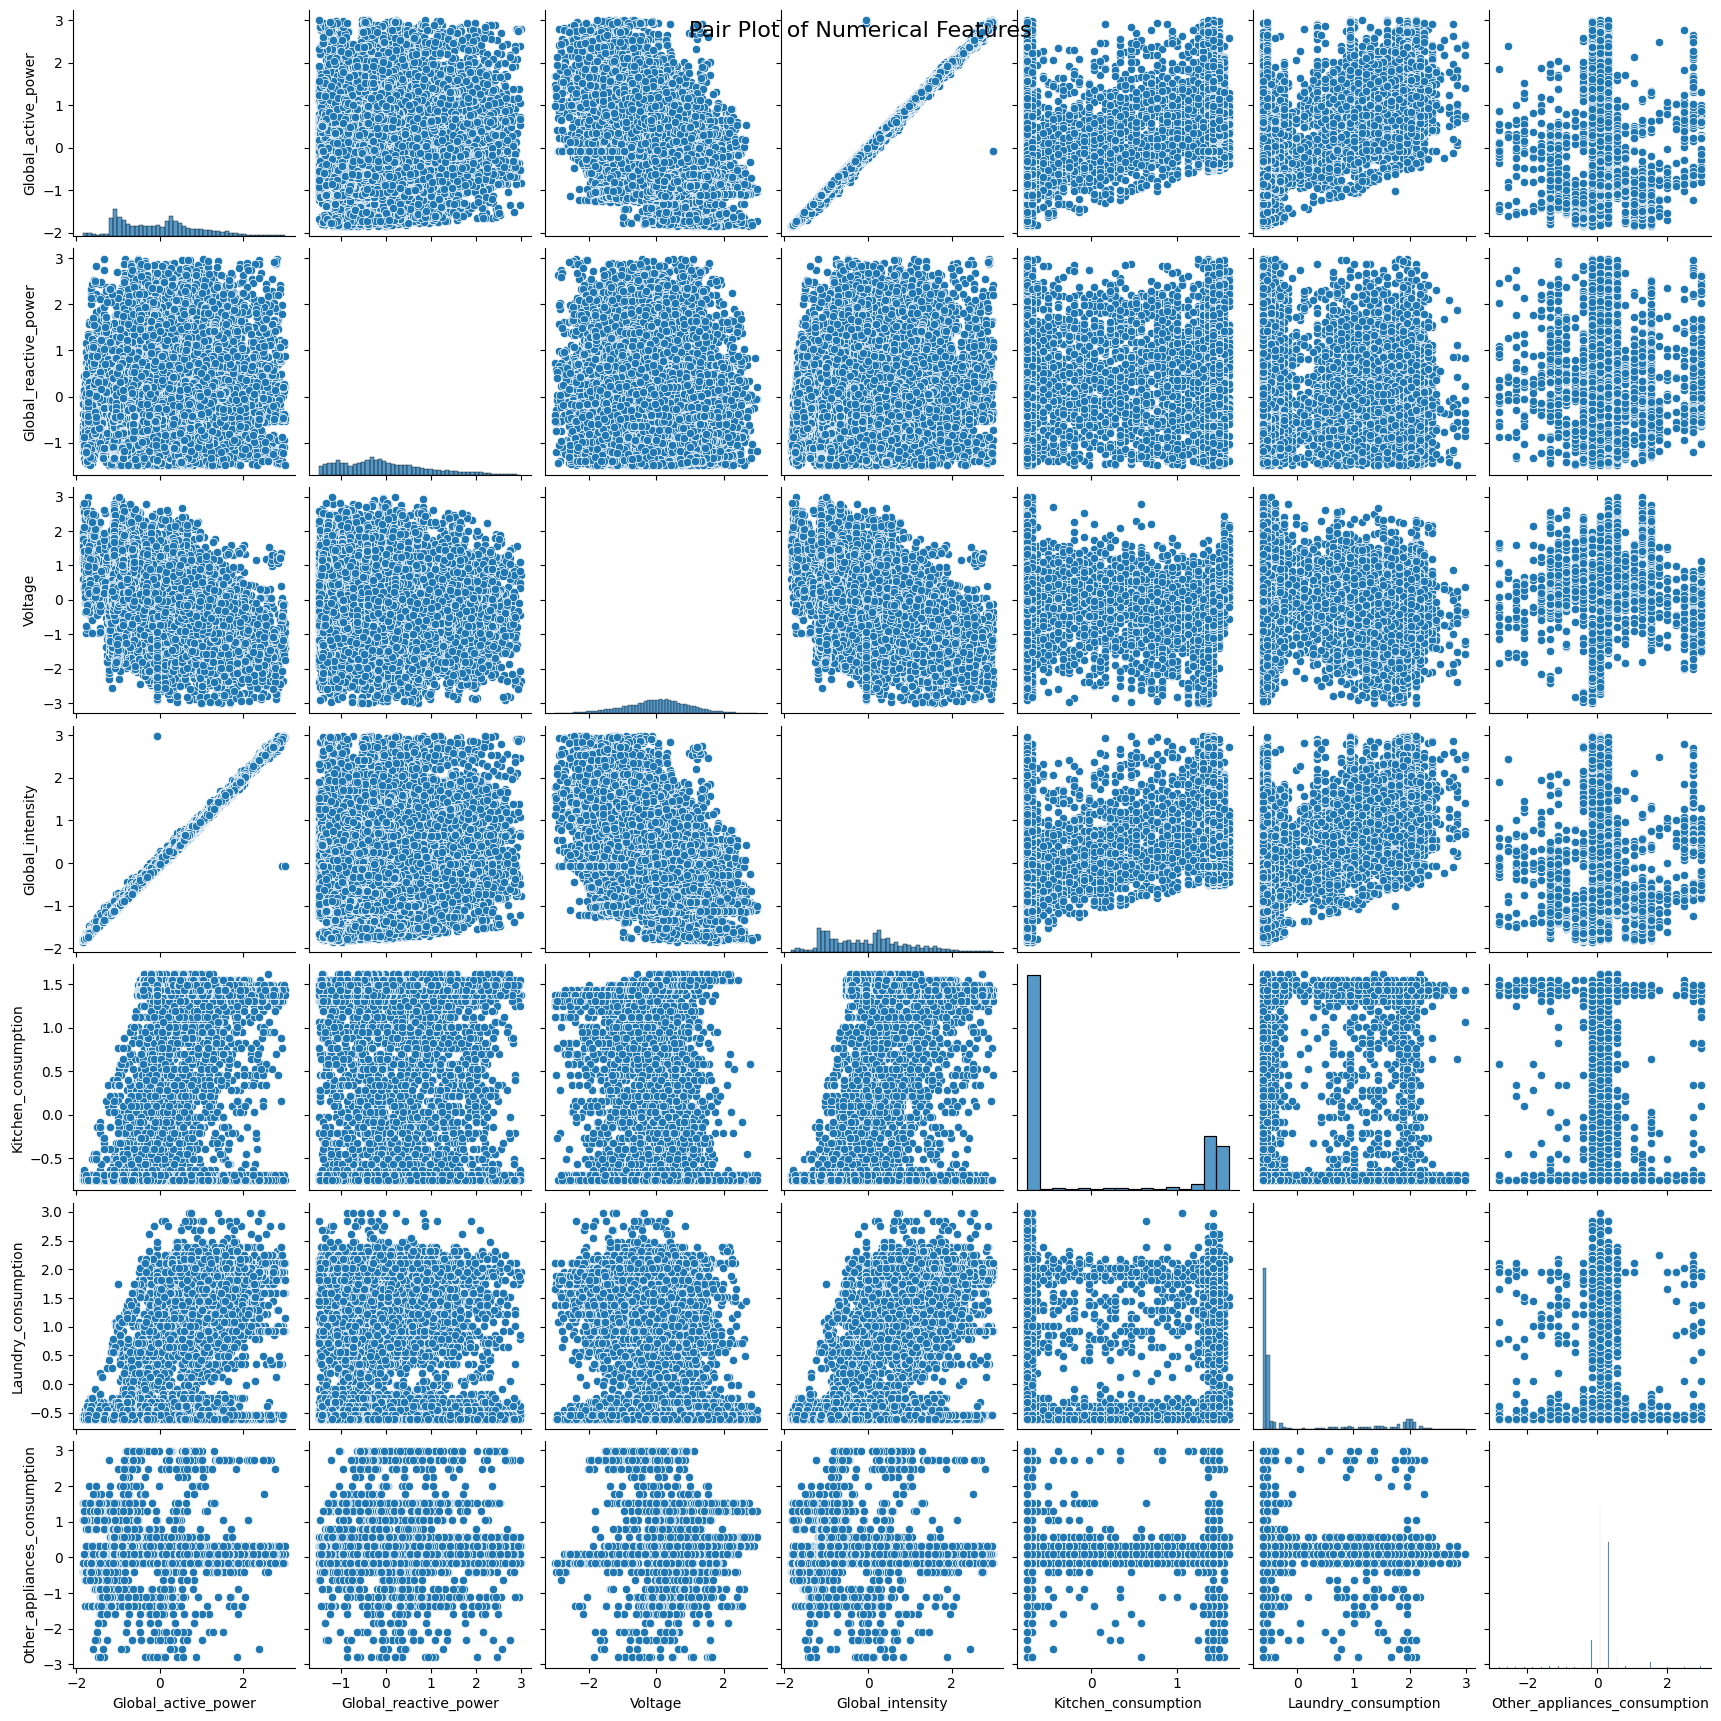

In [147]:
# we can also visualize this using pairplots
# Pair Plots: Visualize pairwise relationships between numerical features
sns.pairplot(df)
plt.suptitle('Pair Plot of Numerical Features', fontsize=16)
plt.show()

In [148]:
final_df = df.drop(columns = ['Global_intensity'])
final_df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Kitchen_consumption', 'Laundry_consumption',
       'Other_appliances_consumption'],
      dtype='object')

####  3. Model Selection: Choose appropriate clustering algorithms (e.g., K-means, Hierarchical Clustering, DBSCAN). (Tip: You can do all three and compare.)  

In [149]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [169]:
# we will reduce the diemnstion of the dataset by using PCA as we want to cluster them in two dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(final_df)
reduced_df = pd.DataFrame(reduced_df, columns = ['PC1', 'PC2'])
reduced_df.head()
# let's see how the data looks like after PCA

PC1       PC2
0 -0.849431  0.582220
1  0.895305  1.575105
2  0.316858  1.105456
3  0.847258  1.660445
4  0.320047  1.195370

#### KMeans Clustering

Text(0, 0.5, 'Inertia')

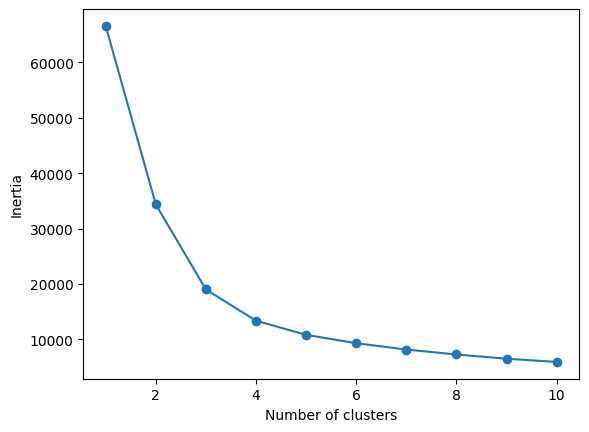

In [173]:
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42,  n_init=10)
    kmeans.fit(reduced_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11),inertias,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

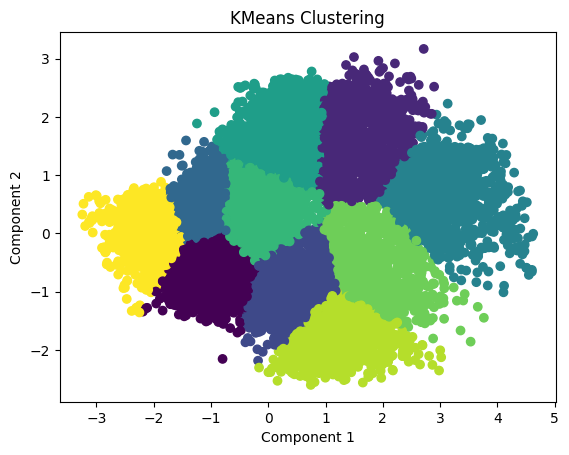

In [181]:
# looks like 4 clusters are good from the elbow graph
k = 4
kemans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(reduced_df)
clusters = kmeans.predict(reduced_df)

plt.scatter(reduced_df.iloc[:, 0], reduced_df.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('KMeans Clustering')
plt.show()

In [182]:
# let's check the silhouette)score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(reduced_df, clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.3420422054527106


In [183]:
# silhoutte score is poor and I am surprised it doesn't change even if I change the k value
# also why inspite of specifying 4 clusters many clusters are showing this is also not clear to me

#### Hirarchical Clustering

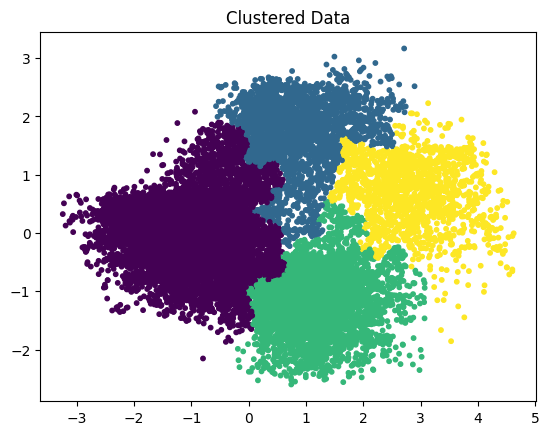

In [196]:
from sklearn.cluster import AgglomerativeClustering

k = 4

# Performing Hierarchical Clustering
agglomerative_cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels = agglomerative_cluster.fit_predict(reduced_df)

# Visualizing the clustered data
plt.scatter(reduced_df.iloc[:, 0], reduced_df.iloc[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("Clustered Data")
plt.show()

In [197]:
# let's check the silhouette)score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(reduced_df, cluster_labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.49926018568483144


#### DBSCAN

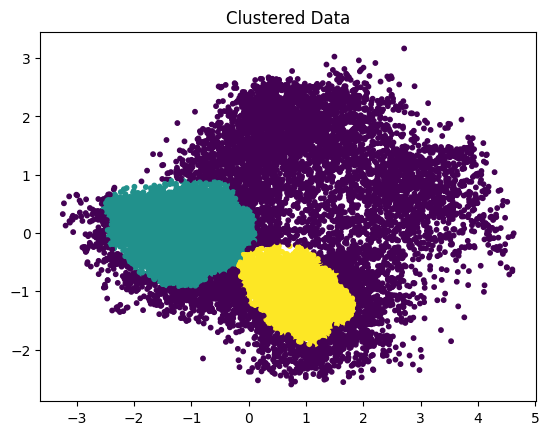

In [249]:
from sklearn.cluster import DBSCAN

# Performing DBSCAN clustering
dbscan_cluster = DBSCAN(eps=0.2, min_samples=185)
cluster_labels = dbscan_cluster.fit_predict(reduced_df)

# Visualizing the clustered data
plt.scatter(reduced_df.iloc[:, 0], reduced_df.iloc[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("Clustered Data")
plt.show()


In [250]:
# let's check the silhouette)score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(reduced_df, cluster_labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.3502501260550526
